In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import difflib
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [5]:
df = pd.read_excel(r'C:\4) Fourth Year\Capstone\Game analysis Dataset\Metacritic Data\Video_Game_Sales.xlsx')

In [6]:
df

,Index,Name,User_Id,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,0,Wii Sports,10240,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76,51,8.0,324,E
1,1,Super Mario Bros.,10258,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,76,51,8.0,324,E
2,2,Mario Kart Wii,10268,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82,73,8.3,712,E
3,3,Wii Sports Resort,10253,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80,73,8.0,193,E
4,4,Pokemon Red/Pokemon Blue,10213,G,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,80,73,8.0,193,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,17411,Nancy Drew: The Deadly Secret of Olde World Park,10222,DS,2007,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01,64,7,7.0,114,E
17412,17412,Fashion Designer: Style Icon,10245,DS,2007,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01,64,7,7.0,114,E
17413,17413,Ashita no Joe 2: The Anime Super Remix,10237,PS2,2002,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01,64,7,7.0,114,E
17414,17414,NadePro!! Kisama no Seiyuu Yatte Miro!,10266,PS2,2009,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01,64,7,7.0,114,E


In [7]:
df.columns

Index(['Index', 'Name', 'User_Id', 'Platform', 'Year_of_Release', 'Genre',
       'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Rating'],
      dtype='object')

In [8]:
df.describe() 

,Index,User_Id,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,17416.00000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000,17416.000000
mean,8707.50000,10250.516364,2006.632407,0.254534,0.140727,0.075020,0.045908,0.516469,67.756890,24.080616,7.041387,139.157097
std,5027.71048,28.798728,5.901034,0.800673,0.497341,0.303412,0.183932,1.526124,13.980707,17.926758,1.535758,511.178604
min,0.00000,10201.000000,1976.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,4353.75000,10226.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.050000,59.000000,11.000000,6.300000,9.000000
50%,8707.50000,10251.000000,2008.000000,0.070000,0.020000,0.000000,0.010000,0.160000,70.000000,19.000000,7.400000,21.000000
75%,13061.25000,10275.000000,2011.000000,0.230000,0.100000,0.030000,0.030000,0.450000,78.000000,33.000000,8.200000,68.000000
max,17415.00000,10300.000000,2017.000000,41.360000,28.960000,10.220000,10.570000,82.540000,98.000000,113.000000,9.700000,10766.000000


In [9]:
df.fillna(method = "ffill")

,Index,Name,User_Id,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,0,Wii Sports,10240,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76,51,8.0,324,E
1,1,Super Mario Bros.,10258,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,76,51,8.0,324,E
2,2,Mario Kart Wii,10268,Wii,2008,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82,73,8.3,712,E
3,3,Wii Sports Resort,10253,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80,73,8.0,193,E
4,4,Pokemon Red/Pokemon Blue,10213,G,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,80,73,8.0,193,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,17411,Nancy Drew: The Deadly Secret of Olde World Park,10222,DS,2007,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01,64,7,7.0,114,E
17412,17412,Fashion Designer: Style Icon,10245,DS,2007,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01,64,7,7.0,114,E
17413,17413,Ashita no Joe 2: The Anime Super Remix,10237,PS2,2002,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01,64,7,7.0,114,E
17414,17414,NadePro!! Kisama no Seiyuu Yatte Miro!,10266,PS2,2009,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01,64,7,7.0,114,E


In [10]:
df['Platform']=df['Platform'].astype(str)
df['Genre']=df['Genre'].astype(str)
df['Publisher']=df['Publisher'].astype(str)
df['Rating']=df['Rating'].astype(str)

In [11]:
df.info() #Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            17416 non-null  int64  
 1   Name             17416 non-null  object 
 2   User_Id          17416 non-null  int64  
 3   Platform         17416 non-null  object 
 4   Year_of_Release  17416 non-null  int64  
 5   Genre            17416 non-null  object 
 6   Publisher        17416 non-null  object 
 7   NA_Sales         17416 non-null  float64
 8   EU_Sales         17416 non-null  float64
 9   JP_Sales         17416 non-null  float64
 10  Other_Sales      17416 non-null  float64
 11  Global_Sales     17416 non-null  float64
 12  Critic_Score     17416 non-null  int64  
 13  Critic_Count     17416 non-null  int64  
 14  User_Score       17416 non-null  float64
 15  User_Count       17416 non-null  int64  
 16  Rating           17416 non-null  object 
dtypes: float64(6

In [12]:
df.Publisher.value_counts() #Count of column values

Electronic Arts                 1380
Activision                      1005
Namco Bandai Games               972
Ubisoft                          970
Konami Digital Entertainment     865
                                ... 
Ongakukan                          1
Technical Associates Inc           1
Now Production                     1
General Entertainment              1
TYO                                1
Name: Publisher, Length: 628, dtype: int64

In [13]:
df.User_Id.value_counts() #Number of users

10267    206
10292    202
10211    198
10256    196
10239    194
        ... 
10240    153
10212    153
10283    151
10251    147
10274    141
Name: User_Id, Length: 100, dtype: int64

In [14]:
df['User_Id'].value_counts()[10283] #Find specific User ID count

151

In [15]:
# Games released over the years

years = df.groupby(['Year_of_Release']).count()
years.Name

Year_of_Release
1976       1
1977       3
1978       4
1979       1
1980      14
1981      46
1982      37
1983      18
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      44
1993      60
1994     121
1995     219
1996     263
1997     294
1998     382
1999     343
2000     354
2001     491
2002     869
2003     801
2004     779
2005     968
2006    1067
2007    1263
2008    1538
2009    1552
2010    1332
2011    1215
2012     690
2013     577
2014     635
2015     657
2016     618
2017       6
Name: Name, dtype: int64

In [16]:
# Mean Sales value by Genre and Year

MedianSales = pd.pivot_table(df,index=['Year_of_Release'], columns=['Genre'], values=['Global_Sales'],
                                         aggfunc=np.mean)
MedianSales.columns = MedianSales.columns.get_level_values(1)

MedianSales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1976,NaN,NaN,NaN,NaN,NaN,0.440000,NaN,NaN,NaN,NaN,NaN,NaN
1977,0.855000,NaN,NaN,NaN,NaN,NaN,0.270000,NaN,NaN,NaN,NaN,NaN
1978,NaN,NaN,NaN,NaN,NaN,0.295000,NaN,NaN,2.530000,NaN,0.150000,NaN
1979,0.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,0.395000,1.300000,0.770000,0.677500,NaN,NaN,0.320000,NaN,2.683333,NaN,0.500000,NaN
1981,0.593600,NaN,NaN,NaN,2.310000,1.120000,0.480000,NaN,1.004000,0.450000,0.197500,NaN
1982,0.362222,NaN,0.470000,0.870000,1.006000,3.343333,0.785000,NaN,0.758000,NaN,0.525000,NaN
1983,0.391250,0.400000,NaN,2.140000,1.386000,0.780000,NaN,NaN,0.480000,NaN,3.200000,NaN
1984,1.850000,NaN,NaN,1.450000,0.690000,1.046667,1.983333,NaN,10.366667,NaN,3.090000,NaN


## Regionwise Sales,          Popular Genres among Users,           Ratingwise Games, 
## Count of Games per Platform  

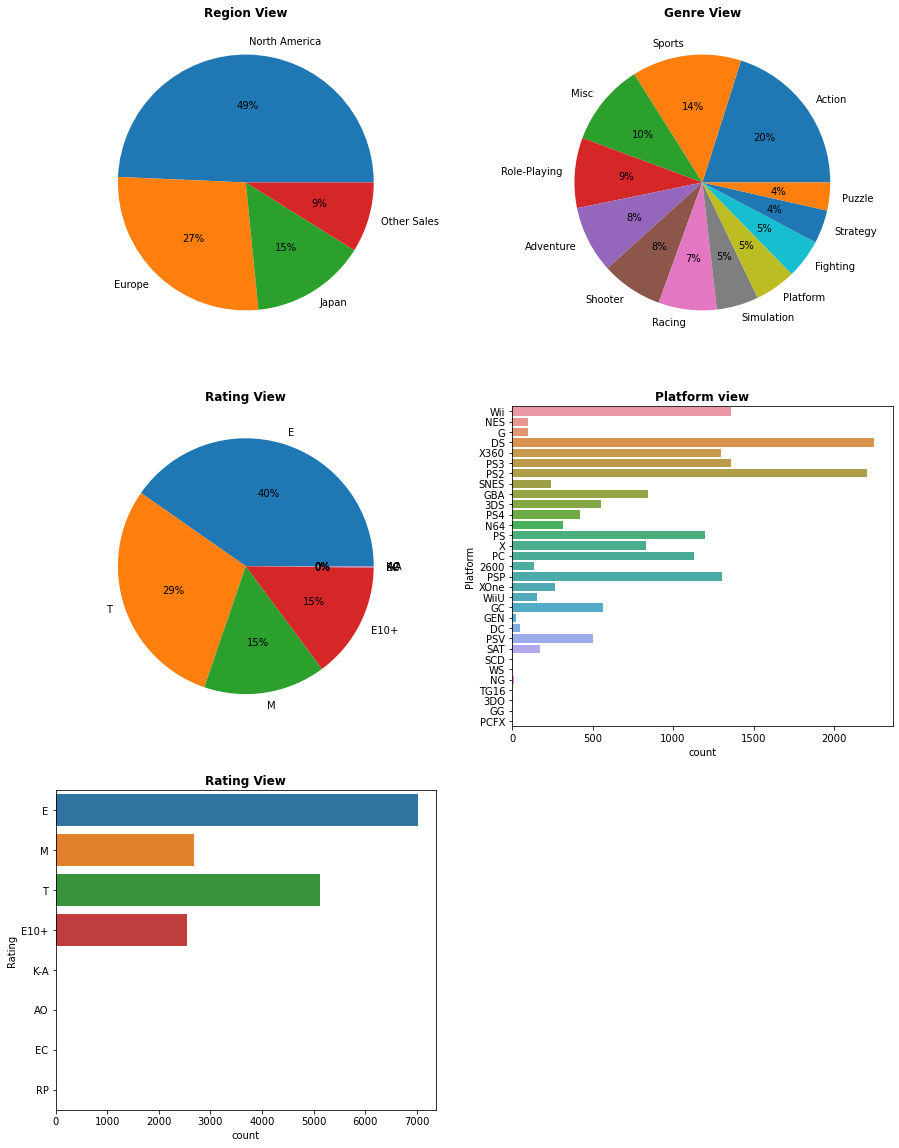

In [17]:
# Regionwise Videogame sales
total_sales = df.Global_Sales.sum()
NA_percent = (df.NA_Sales.sum()*100)/total_sales
EU_percent = (df.EU_Sales.sum()*100)/total_sales
JP_percent = (df.JP_Sales.sum()*100)/total_sales
Other_percent = (df.Other_Sales.sum()*100)/total_sales

plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 1) 
plt.pie([NA_percent,EU_percent,JP_percent,Other_percent],labels=['North America','Europe','Japan','Other Sales'],autopct='%1.0f%%')
plt.title("Region View",fontweight="bold")

plt.subplot(3, 2, 2) 
plt.pie(df.Genre.value_counts(), labels=df.Genre.value_counts().index, autopct='%1.0f%%')
plt.title("Genre View",fontweight="bold")

plt.subplot(3, 2, 3) 
plt.pie(df.Rating.value_counts(), labels=df.Rating.value_counts().index, autopct='%1.0f%%')
plt.title("Rating View",fontweight="bold")

plt.subplot(3, 2, 4) 
sns.countplot(y='Platform', data=df)
plt.title("Platform view",fontweight="bold")

plt.subplot(3, 2, 5) 
sns.countplot(y='Rating', data=df)
plt.title("Rating View",fontweight="bold")

plt.show()

## How Video Game Sales have performed over the span of 30 to 35 Years

Text(0, 0.5, 'Sales (in millions)')

<Figure size 936x360 with 0 Axes>

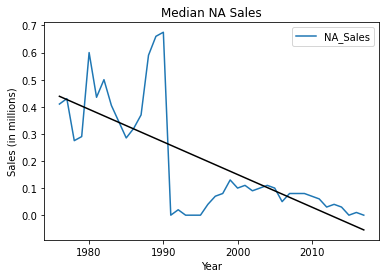

In [18]:
# Median NA Sales

NA_Sales = pd.pivot_table(df, index=['Year_of_Release'], values=['NA_Sales'], aggfunc=np.median)
fig = plt.figure(figsize=(13,5))
NA_Sales.plot()

x_data = np.transpose(np.matrix(NA_Sales.index))
y_data = NA_Sales
regr = linear_model.LinearRegression()
regr.fit(x_data,y_data)
plt.plot(x_data,regr.predict(x_data), color='black')

plt.title('Median NA Sales')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')

Text(0, 0.5, 'Sales (in millions)')

<Figure size 936x360 with 0 Axes>

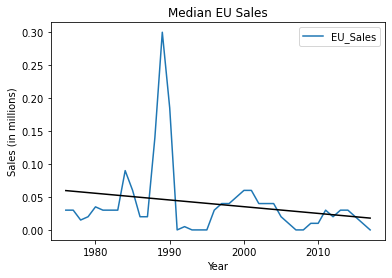

In [19]:
# Median EU Sales

EU_Sales = pd.pivot_table(df, index=['Year_of_Release'], values=['EU_Sales'], aggfunc=np.median)
fig = plt.figure(figsize=(13,5))
EU_Sales.plot()

x_data = np.transpose(np.matrix(EU_Sales.index))
y_data = EU_Sales
regr = linear_model.LinearRegression()
regr.fit(x_data,y_data)
plt.plot(x_data,regr.predict(x_data), color='black')

plt.title('Median EU Sales')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')

Text(0, 0.5, 'Sales (in millions)')

<Figure size 936x360 with 0 Axes>

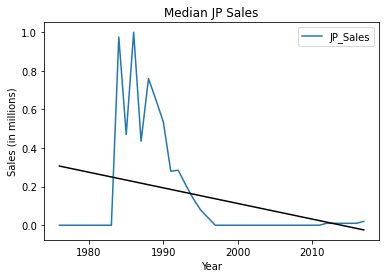

In [20]:
# Median JP Sales

JP_Sales = pd.pivot_table(df, index=['Year_of_Release'], values=['JP_Sales'], aggfunc=np.median)
fig = plt.figure(figsize=(13,5))
JP_Sales.plot()

x_data = np.transpose(np.matrix(JP_Sales.index))
y_data = JP_Sales
regr = linear_model.LinearRegression()
regr.fit(x_data,y_data)
plt.plot(x_data,regr.predict(x_data), color='black')

plt.title('Median JP Sales')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')

Text(0, 0.5, 'Sales (in millions)')

<Figure size 936x360 with 0 Axes>

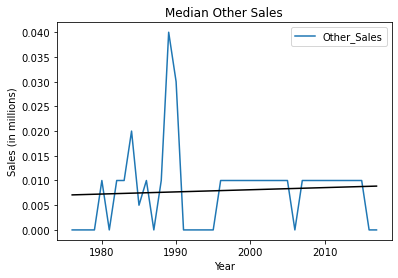

In [21]:
# Median Other Part of World Sales

Other_Sales = pd.pivot_table(df, index=['Year_of_Release'], values=['Other_Sales'], aggfunc=np.median)
fig = plt.figure(figsize=(13,5))
Other_Sales.plot()

x_data = np.transpose(np.matrix(Other_Sales.index))
y_data = Other_Sales
regr = linear_model.LinearRegression()
regr.fit(x_data,y_data)
plt.plot(x_data,regr.predict(x_data), color='black')

plt.title('Median Other Sales')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')

Text(0, 0.5, 'Sales (in millions)')

<Figure size 936x360 with 0 Axes>

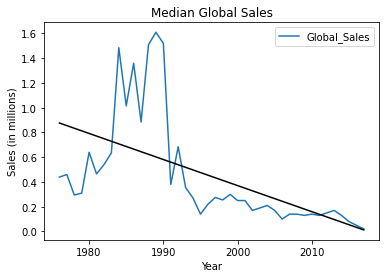

In [22]:
# Median Global Sales

Global_Sales = pd.pivot_table(df, index=['Year_of_Release'], values=['Global_Sales'], aggfunc=np.median)

fig = plt.figure(figsize=(13,5))
Global_Sales.plot()

x_data = np.transpose(np.matrix(Global_Sales.index))
y_data = Global_Sales
regr = linear_model.LinearRegression()
regr.fit(x_data,y_data)
plt.plot(x_data,regr.predict(x_data), color='black')

plt.title('Median Global Sales')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')

## Recomendation System



In [23]:
features = ['Platform','Genre','Publisher','Rating']
print(features)

['Platform', 'Genre', 'Publisher', 'Rating']


In [24]:
combined_features = df['Platform']+' '+df['Genre']+' '+df['Publisher']+' '+df['Rating']

print(combined_features)

0                       Wii Sports Nintendo E
1                     NES Platform Nintendo E
2                       Wii Racing Nintendo E
3                       Wii Sports Nintendo E
4                   G Role-Playing Nintendo E
                         ...                 
17411    DS Adventure Majesco Entertainment E
17412               DS Simulation 505 Games E
17413                   PS2 Fighting Capcom E
17414                  PS2 Adventure GungHo E
17415                PSP Sports Codemasters E
Length: 17416, dtype: object


In [25]:
# Covert Text data to Feature vectors

vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)

In [26]:
# Using Cosine Similarity to get Similarity scores for Recommendation

similarity = cosine_similarity(feature_vectors)

In [27]:
# Get all the Videogame names inside a list

list_of_all_titles = df['Name'].tolist()
print(list_of_all_titles)

['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue', 'Tetris', 'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii', 'Duck Hunt', 'Nintendogs', 'Mario Kart DS', 'Pokemon Gold/Pokemon Silver', 'Wii Fit', 'Kinect Adventures!', 'Wii Fit Plus', 'Grand Theft Auto V', 'Grand Theft Auto: San Andreas', 'Super Mario World', 'Brain Age: Train Your Brain in Minutes a Day', 'Pokemon Diamond/Pokemon Pearl', 'Super Mario Land', 'Super Mario Bros. 3', 'Grand Theft Auto V', 'Grand Theft Auto: Vice City', 'Pokemon Ruby/Pokemon Sapphire', 'Brain Age 2: More Training in Minutes a Day', 'Pokemon Black/Pokemon White', 'Gran Turismo 3: A-Spec', 'Pokemon X/Pokemon Y', 'Call of Duty: Black Ops 3', 'Call of Duty: Modern Warfare 3', 'Call of Duty: Black Ops', 'Pok\\xc3\\xa9mon Yellow: Special Pikachu Edition', 'Call of Duty: Black Ops II', 'Call of Duty: Black Ops II', 'Call of Duty: Modern Warfare 2', 'Grand Theft Auto V', 'Call of Duty: Modern Warf

In [53]:
# Getting a Video Game input from User

game_name = input('Enter Videogame name: ')

Enter Videogame name: Puzzles


In [54]:
# Finding close matches of the Gamename provided by the user

find_close_match = difflib.get_close_matches(game_name, list_of_all_titles)
print(find_close_match)

['Puzzle Quest 2', 'Puzzle City', 'Puzzle Kingdoms']


In [57]:
close_match = find_close_match[0]
print(close_match)

index_of_the_movie = df[df.Name == close_match]['Index'].values[0]
print(index_of_the_movie)

Puzzle Quest 2
9958


In [58]:
# Getting SImilarity scores

similarity_score = list(enumerate(similarity[index_of_the_movie]))
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(4361, 1.0000000000000004), (5451, 1.0000000000000004), (8704, 1.0000000000000004), (9958, 1.0000000000000004), (9802, 0.9338177072253104), (9777, 0.8599121376820332), (6084, 0.8399848385048442), (15783, 0.8382196048178951), (4574, 0.7923162102575658), (11407, 0.7923162102575658), (6559, 0.7656635808475014), (14097, 0.7656635808475014), (15055, 0.7656635808475014), (11781, 0.7612767051797034), (13262, 0.7612767051797034), (15951, 0.7612767051797034), (12025, 0.7569599099872855), (16151, 0.7569599099872855), (16751, 0.7569599099872855), (17255, 0.7569599099872855), (11740, 0.7527850708360057), (5635, 0.7345236815696194), (16369, 0.7251257985519355), (1067, 0.7086081596714447), (4597, 0.7086081596714447), (9233, 0.7086081596714447), (9427, 0.7086081596714447), (10576, 0.7086081596714447), (13689, 0.7086081596714447), (16432, 0.7086081596714447), (16461, 0.7086081596714447), (4884, 0.6935239074863023), (14281, 0.6930271866472898), (9002, 0.6806130686140556), (11494, 0.6806130686140556), 

In [61]:
# Suggested Games as per User input

print('Games suggested for you : \n')

i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  gamename_from_index = df[df.index==index]['Name'].values[0]
  if (i<11):
    print(i,' ',gamename_from_index)
    i+=1

Games suggested for you : 

1   Despicable Me: The Game - Minion Mayhem
2   Puzzle Quest: Challenge of the Warlords
3   Puzzle Quest: Galactrix
4   Puzzle Quest 2
5   Break Em All
6   Puzzle Quest: Challenge of the Warlords
7   Puzzle Quest: Challenge of the Warlords
8   Puzzle Quest: Challenge of the Warlords
9   Naruto: Ninja Council 3
10   The Secret Saturdays: Beasts of the 5th Sun
